In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm


ff1.Cache.enable_cache('2023Austria') 
fp = ff1.get_session(2023, 'Austria', 'Q')
fp.load()

c:\Users\ricca\OneDrive\Desktop\F1dataAnalysis\env\Lib\site-packages\fastf1\utils.py:81: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
c:\Users\ricca\OneDrive\Desktop\F1dataAnalysis\env\Lib\site-packages\fastf1\utils.py:81: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


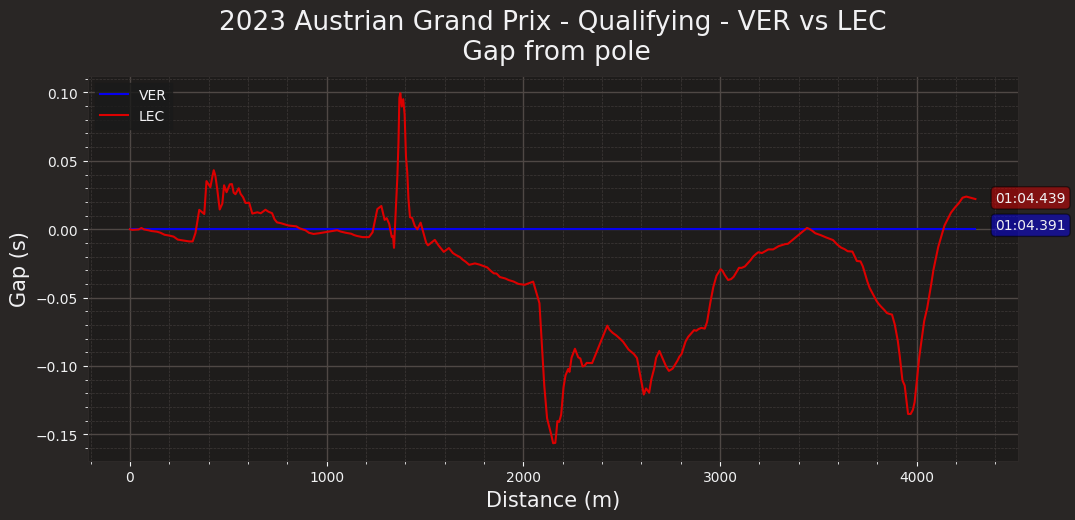

In [13]:
driver_1, driver_2, driver_3 = 'VER', 'LEC', 'SAI'
laps_driver_1 = fp.laps.pick_driver(driver_1)
laps_driver_2 = fp.laps.pick_driver(driver_2)

fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()

telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

team_driver_1 = fastest_driver_1['Team']
team_driver_2 = fastest_driver_2['Team']

delta_time12, ref_tel12, compare_tel12 = utils.delta_time(fastest_driver_1, fastest_driver_2)
delta_time11, ref_tel11, compare_tel11 = utils.delta_time(fastest_driver_1, fastest_driver_1)

plot_size = [12, 5]
plot_title = f"{fp.event.year} {fp.event.EventName} - {fp.name} - {driver_1} vs {driver_2}\n Gap from pole"
plot_ratios = [1]
plotting.setup_mpl()
# Make plot a bit bigger
plt.rcParams['figure.figsize'] = plot_size

# Create subplots with different sizes
fig, ax = plt.subplots(1, gridspec_kw={'height_ratios': plot_ratios})

# Set the plot title
ax.title.set_text(plot_title)

# Delta line
ax.plot(ref_tel11['Distance'], delta_time11, color=ff1.plotting.team_color(team_driver_1), label= driver_1)
ax.plot(ref_tel12['Distance'], delta_time12, color=ff1.plotting.team_color(team_driver_2), label= driver_2)

ax.text(4400, 0, str(fastest_driver_1.LapTime)[10:19], fontsize=10, bbox=dict(boxstyle='round', facecolor=ff1.plotting.team_color(team_driver_1), alpha=0.5))
ax.text(4400, 0.02, str(fastest_driver_2.LapTime)[10:19], fontsize=10, bbox=dict(boxstyle='round', facecolor=ff1.plotting.team_color(team_driver_2), alpha=0.5))
#ax.text(4660, 0.48, str(fastest_driver_3.LapTime)[10:19], fontsize=10, bbox=dict(boxstyle='round', facecolor=ff1.plotting.team_color(team_driver_3), alpha=0.5))

ax.set_ylabel("Gap (s)", fontsize = 10)
ax.set_xlabel("Distance (m)", fontsize=10)
ax.yaxis.label.set_size(15)
ax.xaxis.label.set_size(15)
ax.legend(loc="upper left", prop={'size': 10})